In [1]:
import pandas as pd
import data_loader as dl
import seaborn as sns
import numpy as np
import numbers
import statistics as st
import matplotlib.pyplot as plt
import ast

RDKit WARNING: [08:46:00] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def get_matched_intensities(row):
    intensities = []
    line = row["Matched Ion Intensities"].split(";")
        
    for el in line:
        el = el.strip('][').split(",")
        for sub_el in el:
            sub_el = sub_el.split(":")[1]
            intensities.append(sub_el)
    return intensities

In [3]:
def get_top3_ann(row):
    row['ann_intensities'].sort(key=int, reverse=True)

    return3 = row['ann_intensities'][:3]
    return3 = [float(i) for i in return3]
    
    return return3

In [4]:
def calc_top3_avg(row):
    average = np.mean(list(row['top3']))
    return average

In [5]:
def get_all_intensities(row):
    new_array = ast.literal_eval(row['intensity_array'])
    return new_array

In [6]:
def non_ann_intentisites(row):
    intensities = row['all_intensities']
    ann_inten = row['ann_intensities']
    non_ann = set(intensities) - set(ann_inten)
    return list(non_ann)

In [7]:
def nonannotated_median(row):
    median = np.nanmedian(list(row['nonann_intensities']))
    return median

In [8]:
def get_nonannotated_median(df):
    df["all_intensities"] = df.apply(get_all_intensities, axis=1)
    df["nonann_intensities"] = df.apply(non_ann_intentisites, axis=1)
    df['nonann_median'] = df.apply(nonannotated_median, axis=1)
    return df

In [9]:
def get_top3_average(df):  
    df["ann_intensities"] = df.apply(get_matched_intensities, axis=1)
    df["top3"] = df.apply(get_top3_ann, axis=1)
    df['top3_average'] = df.apply(calc_top3_avg, axis=1)
    return df

In [10]:
 #Read in data
bulk_rep1 = dl.load_joined_psm_mzml('bulk_rep1')[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
bulk_rep2 = dl.load_joined_psm_mzml('bulk_rep2')[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
bulk_rep3 = dl.load_joined_psm_mzml('bulk_rep3')[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]

rep1_2ng = dl.load_joined_psm_mzml("2ng_rep1")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep2_2ng = dl.load_joined_psm_mzml("2ng_rep2")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep3_2ng = dl.load_joined_psm_mzml("2ng_rep3")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep4_2ng = dl.load_joined_psm_mzml("2ng_rep4")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep5_2ng = dl.load_joined_psm_mzml("2ng_rep5")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep6_2ng = dl.load_joined_psm_mzml("2ng_rep6")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]

rep1_02ng = dl.load_joined_psm_mzml("0.2ng_rep1")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep2_02ng = dl.load_joined_psm_mzml("0.2ng_rep2")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep3_02ng = dl.load_joined_psm_mzml("0.2ng_rep3")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep4_02ng = dl.load_joined_psm_mzml("0.2ng_rep4")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep5_02ng = dl.load_joined_psm_mzml("0.2ng_rep5")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep6_02ng = dl.load_joined_psm_mzml("0.2ng_rep6")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]

rep1_sc = dl.load_joined_psm_mzml("sc_rep1")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep2_sc = dl.load_joined_psm_mzml("sc_rep2")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep3_sc = dl.load_joined_psm_mzml("sc_rep3")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep4_sc = dl.load_joined_psm_mzml("sc_rep4")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]
rep5_sc = dl.load_joined_psm_mzml("sc_rep5")[['peptide','minute','Matched Ion Intensities','QValue', 'intensity_array']]



In [11]:
#filter based on retention time gradient
rep1_2ng = rep1_2ng[(rep1_2ng['minute'] < 95) & (rep1_2ng['minute'] >= 27)]
rep2_2ng = rep2_2ng[(rep2_2ng['minute'] < 95) & (rep2_2ng['minute'] >=27)]
rep3_2ng = rep3_2ng[(rep3_2ng['minute'] < 93) & (rep3_2ng['minute'] >=32)]
rep4_2ng = rep4_2ng[(rep4_2ng['minute'] < 91) & (rep4_2ng['minute'] >=32)]
rep5_2ng = rep5_2ng[(rep5_2ng['minute'] < 99) & (rep5_2ng['minute'] >=31)]
rep6_2ng = rep6_2ng[(rep6_2ng['minute'] < 98) & (rep6_2ng['minute'] >=31)]

rep1_02ng = rep1_02ng[(rep1_02ng['minute'] < 94) & (rep1_02ng['minute'] >=28)]
rep2_02ng = rep2_02ng[(rep2_02ng['minute'] < 95) & (rep2_02ng['minute'] >=27)]
rep3_02ng = rep3_02ng[(rep3_02ng['minute'] < 98) & (rep3_02ng['minute'] >=32)]
rep4_02ng = rep4_02ng[(rep4_02ng['minute'] < 98) & (rep4_02ng['minute'] >=32)]
rep5_02ng = rep5_02ng[(rep5_02ng['minute'] < 109) & (rep5_02ng['minute'] >=35)]
rep6_02ng = rep6_02ng[(rep6_02ng['minute'] < 109) & (rep6_02ng['minute'] >=35)]

In [12]:
bulk_rep1 = get_top3_average(bulk_rep1)
bulk_rep2 = get_top3_average(bulk_rep2)
bulk_rep3 = get_top3_average(bulk_rep3)

rep1_2ng = get_top3_average(rep1_2ng)
rep2_2ng = get_top3_average(rep2_2ng)
rep3_2ng = get_top3_average(rep3_2ng)
rep4_2ng = get_top3_average(rep4_2ng)
rep5_2ng = get_top3_average(rep5_2ng)
rep6_2ng = get_top3_average(rep6_2ng)

rep1_02ng = get_top3_average(rep1_02ng)
rep2_02ng = get_top3_average(rep2_02ng)
rep3_02ng = get_top3_average(rep3_02ng)
rep4_02ng = get_top3_average(rep4_02ng)
rep5_02ng = get_top3_average(rep5_02ng)
rep6_02ng = get_top3_average(rep6_02ng)

rep1_sc = get_top3_average(rep1_sc)
rep2_sc = get_top3_average(rep2_sc)
rep3_sc = get_top3_average(rep3_sc)
rep4_sc = get_top3_average(rep4_sc)
rep5_sc = get_top3_average(rep5_sc)


In [13]:
bulk_rep1 = get_nonannotated_median(bulk_rep1)
bulk_rep2 = get_nonannotated_median(bulk_rep2)
bulk_rep3 = get_nonannotated_median(bulk_rep3)

rep1_2ng = get_nonannotated_median(rep1_2ng)
rep2_2ng = get_nonannotated_median(rep2_2ng)
rep3_2ng = get_nonannotated_median(rep3_2ng)
rep4_2ng = get_nonannotated_median(rep4_2ng)
rep5_2ng = get_nonannotated_median(rep5_2ng)
rep6_2ng = get_nonannotated_median(rep6_2ng)

rep1_02ng = get_nonannotated_median(rep1_02ng)
rep2_02ng = get_nonannotated_median(rep2_02ng)
rep3_02ng = get_nonannotated_median(rep3_02ng)
rep4_02ng = get_nonannotated_median(rep4_02ng)
rep5_02ng = get_nonannotated_median(rep5_02ng)
rep6_02ng = get_nonannotated_median(rep6_02ng)

rep1_sc = get_nonannotated_median(rep1_sc)
rep2_sc = get_nonannotated_median(rep2_sc)
rep3_sc = get_nonannotated_median(rep3_sc)
rep4_sc = get_nonannotated_median(rep4_sc)
rep5_sc = get_nonannotated_median(rep5_sc)


In [14]:
bulk_rep1['ann_top3/nonann_median'] = bulk_rep1['top3_average']/bulk_rep1['nonann_median']
bulk_rep2['ann_top3/nonann_median'] = bulk_rep2['top3_average']/bulk_rep2['nonann_median']
bulk_rep3['ann_top3/nonann_median'] = bulk_rep3['top3_average']/bulk_rep3['nonann_median']

rep1_2ng['ann_top3/nonann_median'] = rep1_2ng['top3_average']/rep1_2ng['nonann_median']
rep2_2ng['ann_top3/nonann_median'] = rep2_2ng['top3_average']/rep2_2ng['nonann_median']
rep3_2ng['ann_top3/nonann_median'] = rep3_2ng['top3_average']/rep3_2ng['nonann_median']
rep4_2ng['ann_top3/nonann_median'] = rep4_2ng['top3_average']/rep4_2ng['nonann_median']
rep5_2ng['ann_top3/nonann_median'] = rep5_2ng['top3_average']/rep5_2ng['nonann_median']
rep6_2ng['ann_top3/nonann_median'] = rep6_2ng['top3_average']/rep6_2ng['nonann_median']

rep1_02ng['ann_top3/nonann_median'] = rep1_02ng['top3_average']/rep1_02ng['nonann_median']
rep2_02ng['ann_top3/nonann_median'] = rep2_02ng['top3_average']/rep2_02ng['nonann_median']
rep3_02ng['ann_top3/nonann_median'] = rep3_02ng['top3_average']/rep3_02ng['nonann_median']
rep4_02ng['ann_top3/nonann_median'] = rep4_02ng['top3_average']/rep4_02ng['nonann_median']
rep5_02ng['ann_top3/nonann_median'] = rep5_02ng['top3_average']/rep5_02ng['nonann_median']
rep6_02ng['ann_top3/nonann_median'] = rep6_02ng['top3_average']/rep6_02ng['nonann_median']

rep1_sc['ann_top3/nonann_median'] = rep1_sc['top3_average']/rep1_sc['nonann_median']
rep2_sc['ann_top3/nonann_median'] = rep2_sc['top3_average']/rep2_sc['nonann_median']
rep3_sc['ann_top3/nonann_median'] = rep3_sc['top3_average']/rep3_sc['nonann_median']
rep4_sc['ann_top3/nonann_median'] = rep4_sc['top3_average']/rep4_sc['nonann_median']
rep5_sc['ann_top3/nonann_median'] = rep5_sc['top3_average']/rep5_sc['nonann_median']



In [15]:
#seprate good and medicore spectra
bulk_rep1_good = bulk_rep1[bulk_rep1['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
bulk_rep2_good = bulk_rep2[bulk_rep2['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
bulk_rep3_good = bulk_rep3[bulk_rep3['QValue'] <= .01][['peptide','ann_top3/nonann_median']]

rep1_2ng_good = rep1_2ng[rep1_2ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep2_2ng_good = rep2_2ng[rep2_2ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep3_2ng_good = rep3_2ng[rep3_2ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep4_2ng_good = rep4_2ng[rep4_2ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep5_2ng_good = rep5_2ng[rep5_2ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep6_2ng_good = rep6_2ng[rep6_2ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]

rep1_02ng_good = rep1_02ng[rep1_02ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep2_02ng_good = rep2_02ng[rep2_02ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep3_02ng_good = rep3_02ng[rep3_02ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep4_02ng_good = rep4_02ng[rep4_02ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep5_02ng_good = rep5_02ng[rep5_02ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep6_02ng_good = rep6_02ng[rep6_02ng['QValue'] <= .01][['peptide','ann_top3/nonann_median']]

rep1_sc_good = rep1_sc[rep1_sc['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep2_sc_good = rep2_sc[rep2_sc['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep3_sc_good = rep3_sc[rep3_sc['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep4_sc_good = rep4_sc[rep4_sc['QValue'] <= .01][['peptide','ann_top3/nonann_median']]
rep5_sc_good = rep5_sc[rep5_sc['QValue'] <= .01][['peptide','ann_top3/nonann_median']]


rep1_2ng_med = rep1_2ng[(rep1_2ng['QValue'] > .01) & (rep1_2ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep2_2ng_med = rep2_2ng[(rep2_2ng['QValue'] > .01) & (rep2_2ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep3_2ng_med = rep3_2ng[(rep3_2ng['QValue'] > .01) & (rep3_2ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep4_2ng_med = rep4_2ng[(rep4_2ng['QValue'] > .01) & (rep4_2ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep5_2ng_med = rep5_2ng[(rep5_2ng['QValue'] > .01) & (rep5_2ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep6_2ng_med = rep6_2ng[(rep6_2ng['QValue'] > .01) & (rep6_2ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]

rep1_02ng_med = rep1_02ng[(rep1_02ng['QValue'] > .01) & (rep1_02ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep2_02ng_med = rep2_02ng[(rep2_02ng['QValue'] > .01) & (rep2_02ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep3_02ng_med = rep3_02ng[(rep3_02ng['QValue'] > .01) & (rep3_02ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep4_02ng_med = rep4_02ng[(rep4_02ng['QValue'] > .01) & (rep4_02ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep5_02ng_med = rep5_02ng[(rep5_02ng['QValue'] > .01) & (rep5_02ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep6_02ng_med = rep6_02ng[(rep6_02ng['QValue'] > .01) & (rep6_02ng['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]

rep1_sc_med = rep1_sc[(rep1_sc['QValue'] > .01) & (rep1_sc['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep2_sc_med = rep2_sc[(rep2_sc['QValue'] > .01) & (rep2_sc['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep3_sc_med = rep3_sc[(rep3_sc['QValue'] > .01) & (rep3_sc['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep4_sc_med = rep4_sc[(rep4_sc['QValue'] > .01) & (rep4_sc['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]
rep5_sc_med = rep5_sc[(rep5_sc['QValue'] > .01) & (rep5_sc['QValue'] <= .2)][['peptide','ann_top3/nonann_median']]



In [16]:
#for each file get the ann_top3/nonann_median for each time a peptide is seen
bulk_rep1_good = bulk_rep1_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep2_good = bulk_rep2_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep3_good = bulk_rep3_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_2ng_good = rep1_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_good = rep2_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_good = rep3_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_good = rep4_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_good = rep5_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_good = rep6_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep1_2ng_med = rep1_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_med = rep2_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_med = rep3_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_med = rep4_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_med = rep5_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_med = rep6_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_02ng_good = rep1_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_good = rep2_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_good = rep3_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_good = rep4_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_good = rep5_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_good = rep6_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep1_02ng_med = rep1_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_med = rep2_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_med = rep3_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_med = rep4_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_med = rep5_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_med = rep6_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_sc_good = rep1_sc_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_sc_good = rep2_sc_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_sc_good = rep3_sc_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_sc_good = rep4_sc_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_sc_good = rep5_sc_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep1_sc_med = rep1_sc_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_sc_med = rep2_sc_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_sc_med = rep3_sc_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_sc_med = rep4_sc_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_sc_med = rep5_sc_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()



In [17]:
#change index to be peptide
bulk_rep1_good = bulk_rep1_good.set_index("peptide")
bulk_rep2_good = bulk_rep2_good.set_index("peptide")
bulk_rep3_good = bulk_rep3_good.set_index("peptide")

rep1_2ng_good = rep1_2ng_good.set_index("peptide")
rep2_2ng_good = rep2_2ng_good.set_index("peptide")
rep3_2ng_good = rep3_2ng_good.set_index("peptide")
rep4_2ng_good = rep4_2ng_good.set_index("peptide")
rep5_2ng_good = rep5_2ng_good.set_index("peptide")
rep6_2ng_good = rep6_2ng_good.set_index("peptide")
rep1_2ng_med = rep1_2ng_med.set_index("peptide")
rep2_2ng_med = rep2_2ng_med.set_index("peptide")
rep3_2ng_med = rep3_2ng_med.set_index("peptide")
rep4_2ng_med = rep4_2ng_med.set_index("peptide")
rep5_2ng_med = rep5_2ng_med.set_index("peptide")
rep6_2ng_med = rep6_2ng_med.set_index("peptide")

rep1_02ng_good = rep1_02ng_good.set_index("peptide")
rep2_02ng_good = rep2_02ng_good.set_index("peptide")
rep3_02ng_good = rep3_02ng_good.set_index("peptide")
rep4_02ng_good = rep4_02ng_good.set_index("peptide")
rep5_02ng_good = rep5_02ng_good.set_index("peptide")
rep6_02ng_good = rep6_02ng_good.set_index("peptide")
rep1_02ng_med = rep1_02ng_med.set_index("peptide")
rep2_02ng_med = rep2_02ng_med.set_index("peptide")
rep3_02ng_med = rep3_02ng_med.set_index("peptide")
rep4_02ng_med = rep4_02ng_med.set_index("peptide")
rep5_02ng_med = rep5_02ng_med.set_index("peptide")
rep6_02ng_med = rep6_02ng_med.set_index("peptide")

rep1_sc_good = rep1_sc_good.set_index("peptide")
rep2_sc_good = rep2_sc_good.set_index("peptide")
rep3_sc_good = rep3_sc_good.set_index("peptide")
rep4_sc_good = rep4_sc_good.set_index("peptide")
rep5_sc_good = rep5_sc_good.set_index("peptide")
rep1_sc_med = rep1_sc_med.set_index("peptide")
rep2_sc_med = rep2_sc_med.set_index("peptide")
rep3_sc_med = rep3_sc_med.set_index("peptide")
rep4_sc_med = rep4_sc_med.set_index("peptide")
rep5_sc_med = rep5_sc_med.set_index("peptide")



In [18]:
#merge
#from here on bulk has been filtered for quality scans
bulk_allreps = pd.concat([bulk_rep1_good, bulk_rep2_good], join='outer')
bulk_allreps = pd.concat([bulk_allreps, bulk_rep3_good], join='outer')

allreps_2ng_good = pd.concat([rep1_2ng_good, rep2_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep3_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep4_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep5_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep6_2ng_good], join='outer')

allreps_02ng_good = pd.concat([rep1_02ng_good, rep2_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep3_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep4_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep5_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep6_02ng_good], join='outer')

allreps_sc_good = pd.concat([rep1_sc_good, rep2_sc_good], join='outer')
allreps_sc_good = pd.concat([allreps_sc_good, rep3_sc_good], join='outer')
allreps_sc_good = pd.concat([allreps_sc_good, rep4_sc_good], join='outer')
allreps_sc_good = pd.concat([allreps_sc_good, rep5_sc_good], join='outer')


allreps_2ng_med = pd.concat([rep1_2ng_med, rep2_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep3_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep4_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep5_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep6_2ng_med], join='outer')

allreps_02ng_med = pd.concat([rep1_02ng_med, rep2_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep3_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep4_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep5_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep6_02ng_med], join='outer')

allreps_sc_med = pd.concat([rep1_sc_med, rep2_sc_med], join='outer')
allreps_sc_med = pd.concat([allreps_sc_med, rep3_sc_med], join='outer')
allreps_sc_med = pd.concat([allreps_sc_med, rep4_sc_med], join='outer')
allreps_sc_med = pd.concat([allreps_sc_med, rep5_sc_med], join='outer')



In [19]:
bulk_allreps = bulk_allreps.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_good = allreps_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_med = allreps_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_good = allreps_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_med = allreps_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_sc_good = allreps_sc_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_sc_med = allreps_sc_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()


In [20]:
def calc_aver_top3_to_median_ratio(row):
    all_counts = row['ann_top3/nonann_median']
    all_counts = all_counts.split(',')
    all_counts = list(map(float, all_counts))
    count_mean = np.nanmean(all_counts)
    return count_mean

In [21]:
bulk_allreps['mean_inten_diff'] = bulk_allreps.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_2ng_good['mean_inten_diff'] = allreps_2ng_good.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_2ng_med['mean_inten_diff'] = allreps_2ng_med.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_02ng_good['mean_inten_diff'] = allreps_02ng_good.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_02ng_med['mean_inten_diff'] = allreps_02ng_med.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_sc_good['mean_inten_diff'] = allreps_sc_good.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_sc_med['mean_inten_diff'] = allreps_sc_med.apply(calc_aver_top3_to_median_ratio, axis=1)


In [22]:
bulk_allreps = bulk_allreps.set_index("peptide")
allreps_2ng_good = allreps_2ng_good.set_index("peptide")
allreps_2ng_med = allreps_2ng_med.set_index("peptide")
allreps_02ng_good = allreps_02ng_good.set_index("peptide")
allreps_02ng_med = allreps_02ng_med.set_index("peptide")
allreps_sc_good = allreps_sc_good.set_index("peptide")
allreps_sc_med = allreps_sc_med.set_index("peptide")



In [23]:
#outer join all together based on peptide
bulk_allreps.columns = [str(col) + '_bulk' for col in bulk_allreps.columns]
allreps_2ng_good.columns = [str(col) + '_2ng_good' for col in allreps_2ng_good.columns]
allreps_2ng_med.columns = [str(col) + '_2ng_med' for col in allreps_2ng_med.columns]
allreps_02ng_good.columns = [str(col) + '_0.2ng_good' for col in allreps_02ng_good.columns]
allreps_02ng_med.columns = [str(col) + '_0.2ng_med' for col in allreps_02ng_med.columns]
allreps_sc_good.columns = [str(col) + '_sc_good' for col in allreps_sc_good.columns]
allreps_sc_med.columns = [str(col) + '_sc_med' for col in allreps_sc_med.columns]


megatable = pd.concat([bulk_allreps, allreps_2ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_2ng_med], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_med], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_sc_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_sc_med], axis=1, join='outer')

In [24]:
megatable

,ann_top3/nonann_median_bulk,mean_inten_diff_bulk,ann_top3/nonann_median_2ng_good,mean_inten_diff_2ng_good,ann_top3/nonann_median_2ng_med,mean_inten_diff_2ng_med,ann_top3/nonann_median_0.2ng_good,mean_inten_diff_0.2ng_good,ann_top3/nonann_median_0.2ng_med,mean_inten_diff_0.2ng_med,ann_top3/nonann_median_sc_good,mean_inten_diff_sc_good,ann_top3/nonann_median_sc_med,mean_inten_diff_sc_med
peptide,,,,,,,,,,,,,,
AAAAAAAAAAAAAAAGAGAGAK,"4.988483842244098,5.511981874739533,8.69147858...",6.397315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,"36.96670600127,54.910389899192204,22.267654595...",33.910217,"7.871731614219018,4.947682594149982,6.59864849...",7.189399,NaN,NaN,"3.9579453120912746,2.7639525712926014",3.360949,NaN,NaN,"2.1374099817267096,1.7309452015700952,3.437556...",2.357931,"2.7457880317691647,4.668880969995984,2.6833389...",3.800767
AAAAAAAAAVSR,"52.06181751105902,12.690423625977061",32.376121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAALQAK,"15.633197723748452,27.136053491748385,22.51223...",18.366508,"13.904680096335177,31.83660705115729,15.621140...",35.214680,NaN,NaN,"23.993175352640662,31.876517577228018,23.52699...",18.578702,NaN,NaN,"5.703672775397274,5.629015324168344,7.81999164...",8.264906,NaN,NaN
AAAAATVVPPMVGGPPFVGPVGFGPGDR,"6.7440827011659366,29.25569832747022,12.305449...",16.008555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YRSDGALLLGASSLSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.632969865834554,2.632970
YSDRNHQITR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"22.88821710520001,13.410131139607566,16.309680...",17.536010
YSLATEEIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.355716756008053,5.355717


In [25]:
df_2ng_good = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_2ng_good']]
df_2ng_good['2ng quality'] = df_2ng_good['mean_inten_diff_bulk']/df_2ng_good['mean_inten_diff_2ng_good']
df_2ng_med = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_2ng_med']]
df_2ng_med['2ng mediocre'] = df_2ng_med['mean_inten_diff_bulk']/df_2ng_med['mean_inten_diff_2ng_med']

df_02ng_good = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_0.2ng_good']]
df_02ng_good['0.2ng quality'] = df_02ng_good['mean_inten_diff_bulk']/df_02ng_good['mean_inten_diff_0.2ng_good']
df_02ng_med = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_0.2ng_med']]
df_02ng_med['0.2ng mediocre'] = df_02ng_med['mean_inten_diff_bulk']/df_02ng_med['mean_inten_diff_0.2ng_med']

df_sc_good = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_sc_good']]
df_sc_good['sc quality'] = df_sc_good['mean_inten_diff_bulk']/df_sc_good['mean_inten_diff_sc_good']
df_sc_med = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_sc_med']]
df_sc_med['sc mediocre'] = df_sc_med['mean_inten_diff_bulk']/df_sc_med['mean_inten_diff_sc_med']


kde_df = pd.concat([df_2ng_good[['2ng quality']],df_02ng_good[['0.2ng quality']]], axis=1)
kde_df = pd.concat([kde_df, df_sc_good[['sc quality']]], axis=1)
kde_df = pd.concat([kde_df, df_2ng_med[['2ng mediocre']]], axis=1)
kde_df = pd.concat([kde_df, df_02ng_med[['0.2ng mediocre']]], axis=1)
kde_df = pd.concat([kde_df, df_sc_med[['sc mediocre']]], axis=1)

<ipython-input-25-53b0f666bc21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2ng_good['2ng quality'] = df_2ng_good['mean_inten_diff_bulk']/df_2ng_good['mean_inten_diff_2ng_good']
<ipython-input-25-53b0f666bc21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2ng_med['2ng mediocre'] = df_2ng_med['mean_inten_diff_bulk']/df_2ng_med['mean_inten_diff_2ng_med']
<ipython-input-25-53b0f666bc21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

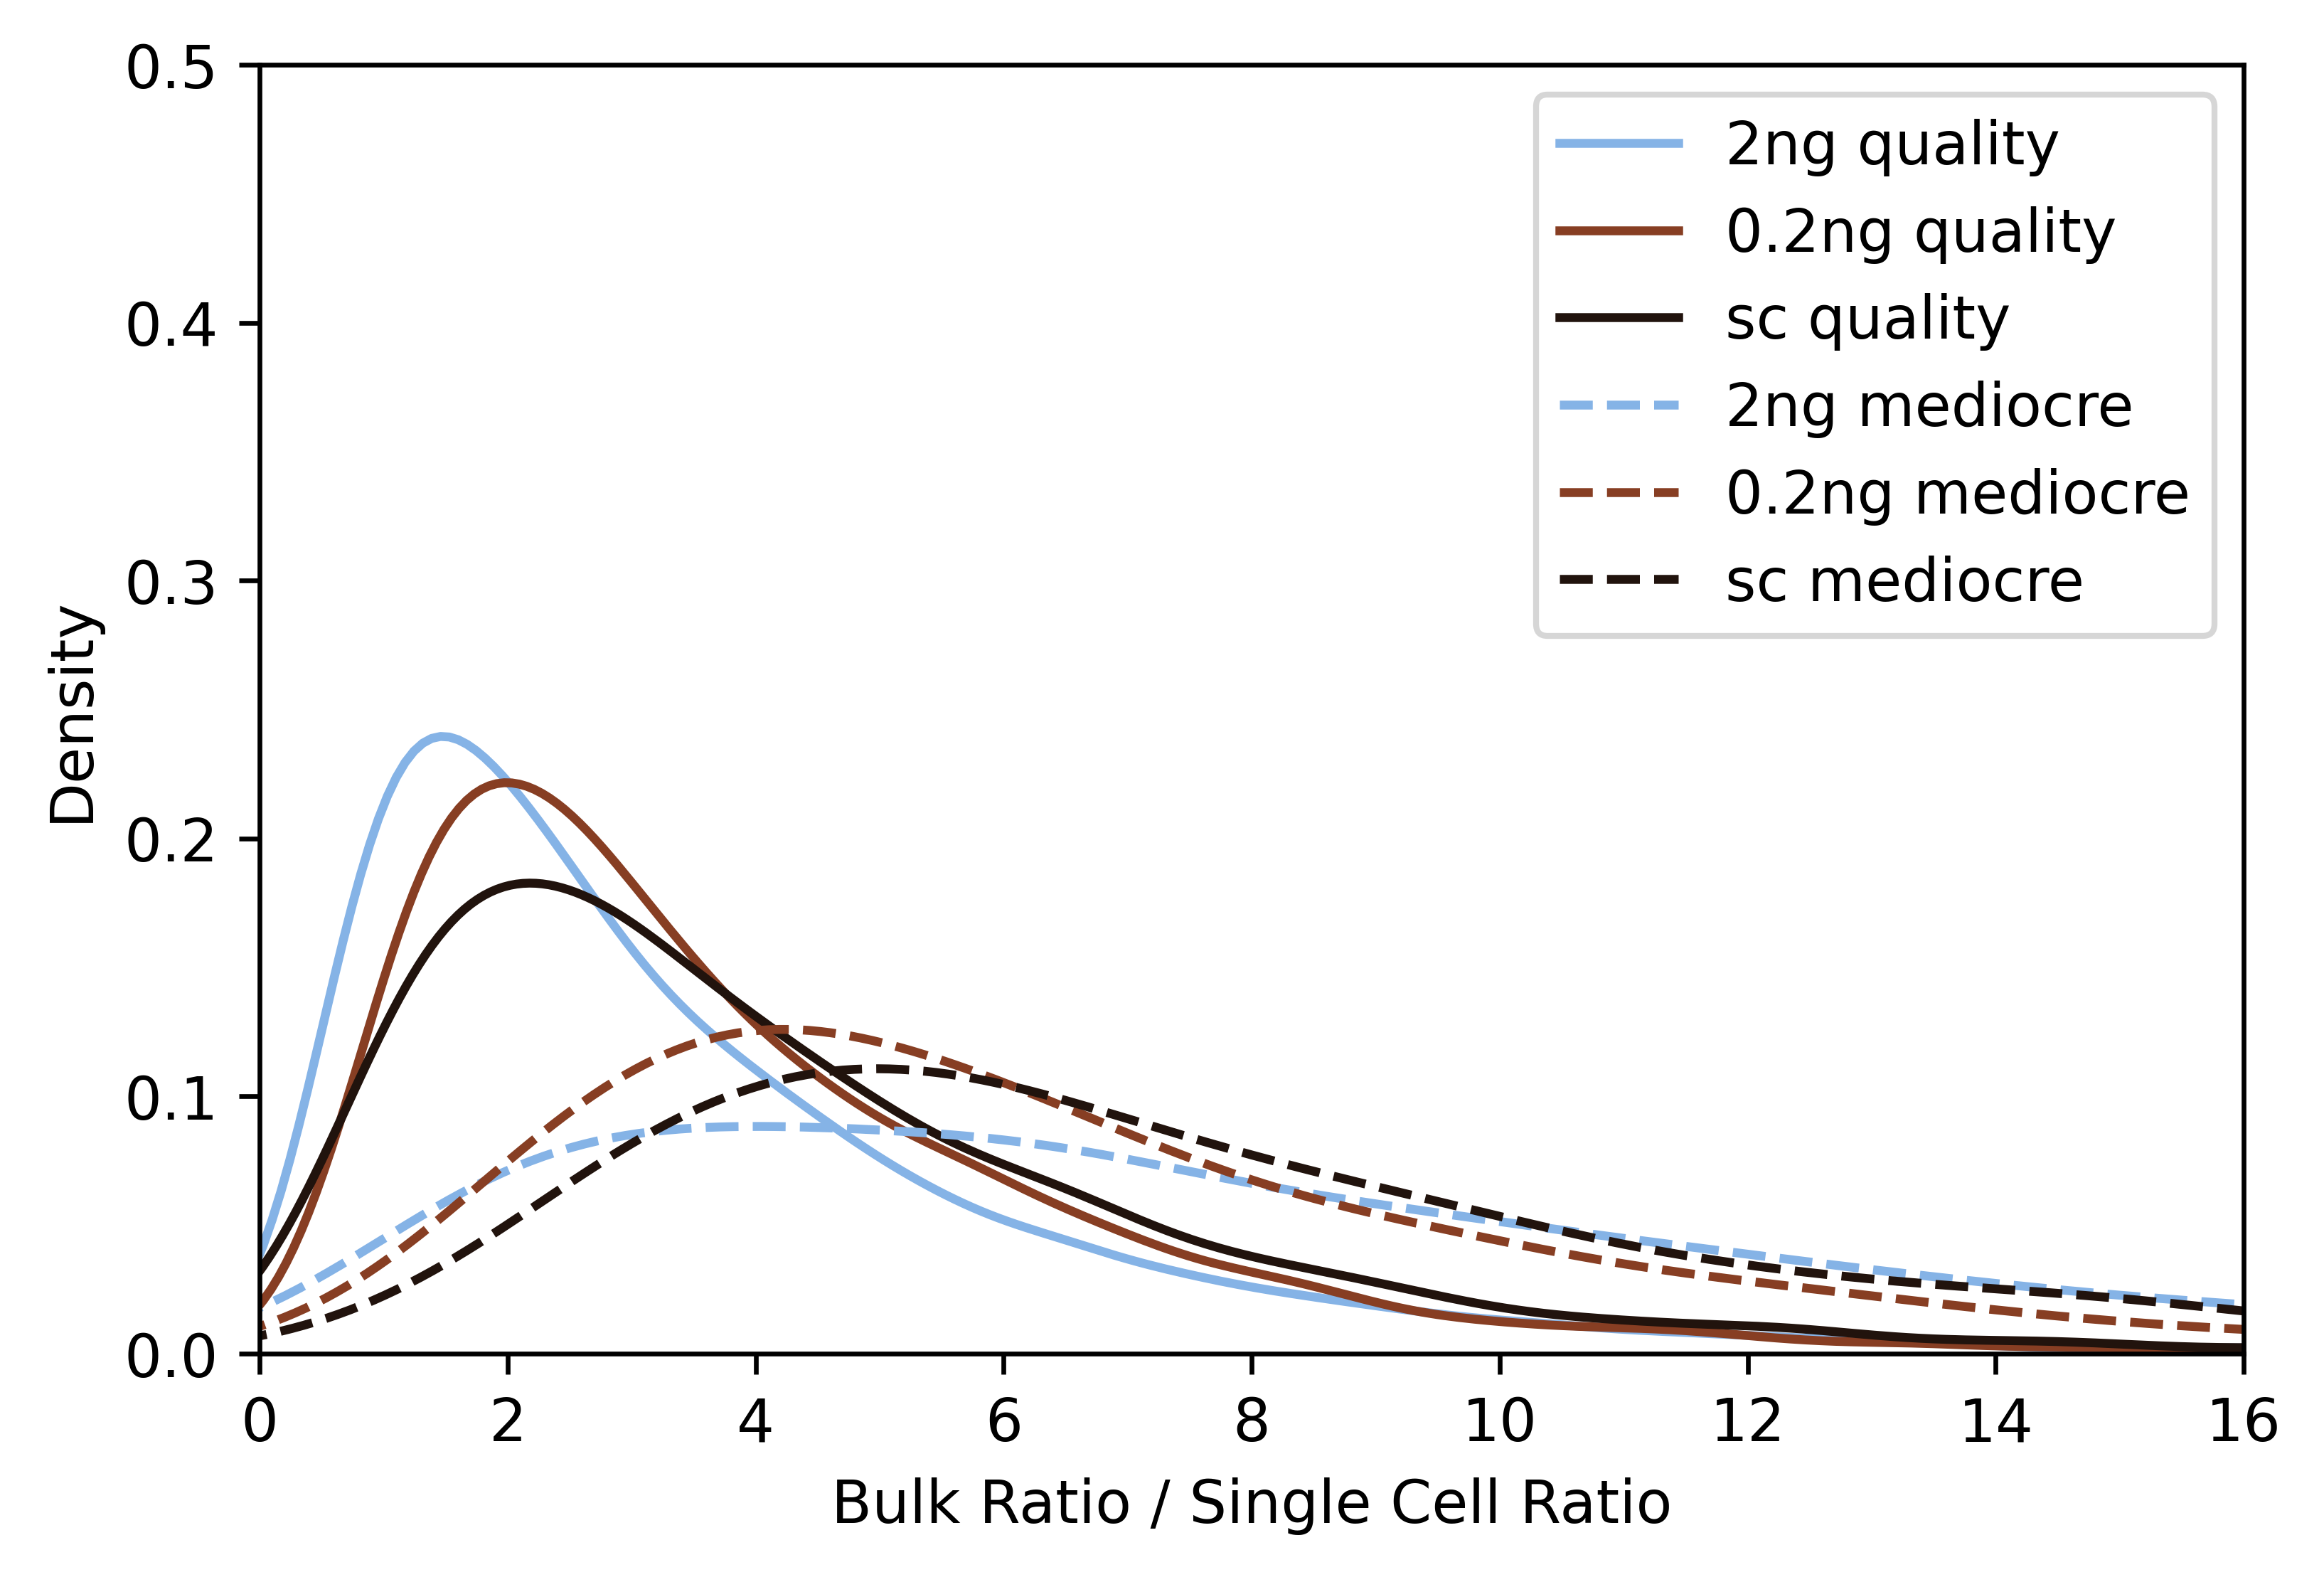

In [35]:
color_dict = {'2ng quality': '#85b3e6', '0.2ng quality': '#873e23', 'sc quality':'#21130d',
             '2ng mediocre': '#85b3e6', '0.2ng mediocre': '#873e23', 'sc mediocre':'#21130d'}

plt.rcParams["figure.dpi"] = 600
ax = kde_df.plot.kde(color=[color_dict.get(x, '#333333') for x in kde_df.columns])
ax.lines[0].set_linestyle("-")
ax.lines[1].set_linestyle("-")
ax.lines[2].set_linestyle("-")
ax.lines[3].set_linestyle("--")
ax.lines[4].set_linestyle("--")
ax.lines[5].set_linestyle("--")

leg = ax.legend()
leg_lines = leg.get_lines()

ax.set_xlim(-1, 17)
ax.set_title("")
# plt.xticks(list(range(-7,12)))
plt.xlim(0,16)
plt.ylim(0,0.5)
plt.xlabel('Bulk Ratio / Single Cell Ratio')
fig1 = plt.gcf()
plt.show()

In [36]:
plt.rcParams["figure.dpi"] = 600
fig1.savefig('Figures/figure3B.jpg',bbox_inches='tight')

In [28]:
megatable.columns

Index(['ann_top3/nonann_median_bulk', 'mean_inten_diff_bulk',
       'ann_top3/nonann_median_2ng_good', 'mean_inten_diff_2ng_good',
       'ann_top3/nonann_median_2ng_med', 'mean_inten_diff_2ng_med',
       'ann_top3/nonann_median_0.2ng_good', 'mean_inten_diff_0.2ng_good',
       'ann_top3/nonann_median_0.2ng_med', 'mean_inten_diff_0.2ng_med',
       'ann_top3/nonann_median_sc_good', 'mean_inten_diff_sc_good',
       'ann_top3/nonann_median_sc_med', 'mean_inten_diff_sc_med'],
      dtype='object')

In [29]:
testing_sta = megatable[megatable.index =='ANGTTVHVGIHPSK'][['ann_top3/nonann_median_0.2ng_good','ann_top3/nonann_median_0.2ng_med','mean_inten_diff_0.2ng_good','mean_inten_diff_0.2ng_med']]
testing_sta

,ann_top3/nonann_median_0.2ng_good,ann_top3/nonann_median_0.2ng_med,mean_inten_diff_0.2ng_good,mean_inten_diff_0.2ng_med
peptide,,,,
ANGTTVHVGIHPSK,"4.277179454716231,4.66994544204252,6.232104219...",1.9831824220430871,4.460464,1.983182


In [30]:
testing_sta.iloc[0]['ann_top3/nonann_median_0.2ng_good']

'4.277179454716231,4.66994544204252,6.232104219284326,2.6626255563332943'